In [1]:
# importing needed modules
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
# to prevent warning
pd.options.mode.chained_assignment = None


In [2]:
# reading the dataset
df = pd.read_csv("traffic.csv",parse_dates=True, index_col='DateTime')


# extract year from date
df['Year'] = pd.Series(df.index).apply(lambda x: x.year).to_list()

# extract month from date
df['Month'] = pd.Series(df.index).apply(lambda x: x.month).to_list()

# # extract day from date
# df['Day'] = pd.Series(df.index).apply(lambda x: x.day).to_list()

# extract hour from date
df['Hour'] = pd.Series(df.index).apply(lambda x: x.hour).to_list()

df["Series"] = [1]*len(df)

# df = df[df["Junction"] == 1]

# iterates through the rows and updates series value of each row with the dayOfYear value
for index, row in df.iterrows():
    row["Series"]=index.dayofyear

In [3]:
# feature part
X = df[["Junction",'Year','Hour','Series']].values.tolist()
# label part (vehicle counts)
y = sk.utils.validation.column_or_1d(df[["Vehicles"]].values.tolist())
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [4]:
svr = make_pipeline(StandardScaler(), SVR(kernel="poly", gamma="auto", degree=7, epsilon=0.1))
svr.fit(X_train, y_train)
# print(svr.score(X_test, y_test))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(degree=7, gamma='auto', kernel='poly'))])

In [5]:
rf = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=1000,
max_features='sqrt',min_samples_leaf=2,max_depth=20,
criterion='squared_error'))
rf.fit(X_train, y_train)
# print(rf.score(X_test, y_test))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       min_samples_leaf=2,
                                       n_estimators=1000))])

In [6]:
print(svr.score(X_test, y_test))
print(rf.score(X_test, y_test))

0.671166693000077
0.9073273826778683


In [7]:
# from 2016-1-1 to 2016-12-31 in junction 1
df2017_j1 = df[(df.index > '2016-1-1') & (df.index <= '2016-12-31') & (df["Junction"] == 1)]
df2017_j1["Year"] += 1
df2017_j1["Junction"] = [1]*8760
# from 2016-1-1 to 2016-12-31 in junction 2
X1 = df2017_j1[["Junction",'Year','Hour','Series']].values.tolist()
df2017_j2 = df[(df.index > '2016-1-1') & (df.index <= '2016-12-31') & (df["Junction"] == 1)]
df2017_j2["Year"] += 1
df2017_j2["Junction"] = [2]*8760
# from 2016-1-1 to 2016-12-31 in junction 3
X2 = df2017_j2[["Junction",'Year','Hour','Series']].values.tolist()
df2017_j3 = df[(df.index > '2016-1-1') & (df.index <= '2016-12-31') & (df["Junction"] == 1)]
df2017_j3["Year"] += 1
df2017_j3["Junction"] = [3]*8760
# from 2016-1-1 to 2016-12-31 in junction 4
X3 = df2017_j3[["Junction",'Year','Hour','Series']].values.tolist()
df2017_j4 = df[(df.index > '2016-1-1') & (df.index <= '2016-12-31') & (df["Junction"] == 1)]
df2017_j4["Year"] += 1
df2017_j4["Junction"] = [4]*8760
X4 = df2017_j4[["Junction",'Year','Hour','Series']].values.tolist()

In [8]:
# predicting data based on svr and rf through every junction
svrp1 = (svr.predict(X1))
svrp2 = (svr.predict(X2))
svrp3 = (svr.predict(X3))
svrp4 = (svr.predict(X4))
rfp1 = (rf.predict(X1))
rfp2 = (rf.predict(X2))
rfp3 = (rf.predict(X3))
rfp4 = (rf.predict(X4))
svrp1 = [round(x) for x in svrp1]
svrp2 = [round(x) for x in svrp2]
svrp3 = [round(x) for x in svrp3]
svrp4 = [round(x) for x in svrp4]
rfp1 = [round(x) for x in rfp1]
rfp2 = [round(x) for x in rfp2]
rfp3 = [round(x) for x in rfp3]
rfp4 = [round(x) for x in rfp4]


In [9]:
startYear,endYear=2017,2018
ans1 = df[(df.index > f'{startYear}-1-1') & (df.index <= f'{endYear}-12-31') & (df["Junction"] == 1)]
ans1 = sk.utils.validation.column_or_1d(ans1[["Vehicles"]].values.tolist())
ans2 = df[(df.index > f'{startYear}-1-1') & (df.index <= f'{endYear}-12-31') & (df["Junction"] == 2)]
ans2 = sk.utils.validation.column_or_1d(ans2[["Vehicles"]].values.tolist())
ans3 = df[(df.index > f'{startYear}-1-1') & (df.index <= f'{endYear}-12-31') & (df["Junction"] == 3)]
ans3 = sk.utils.validation.column_or_1d(ans3[["Vehicles"]].values.tolist())
ans4 = df[(df.index > f'{startYear}-1-1') & (df.index <= f'{endYear}-12-31') & (df["Junction"] == 4)]
ans4 = sk.utils.validation.column_or_1d(ans4[["Vehicles"]].values.tolist())

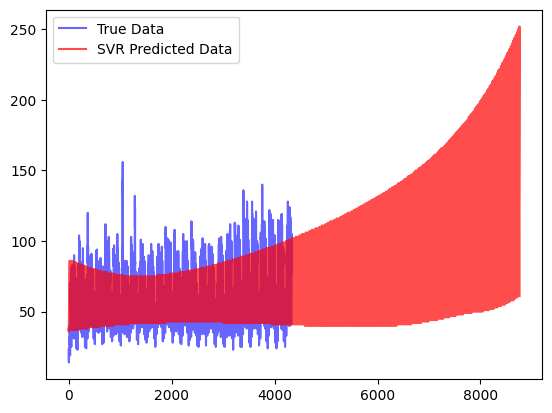

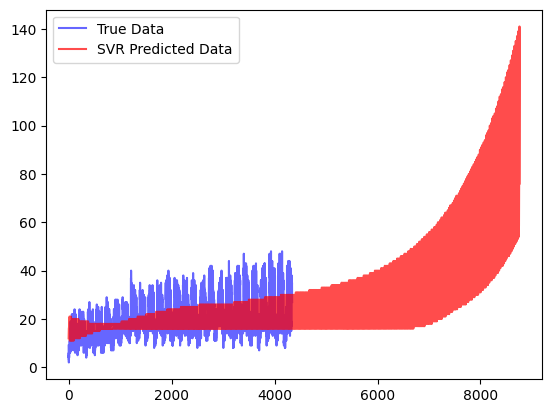

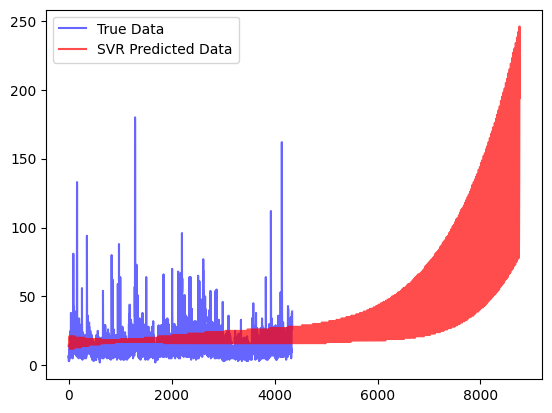

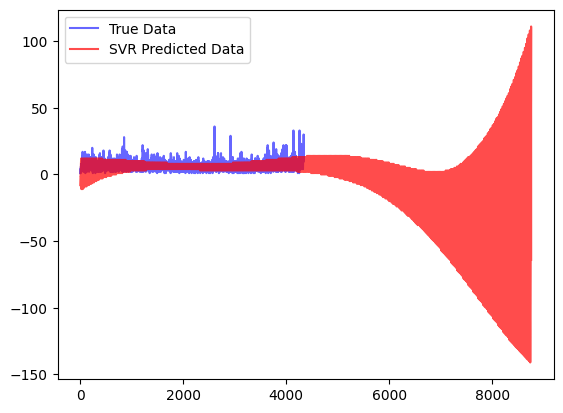

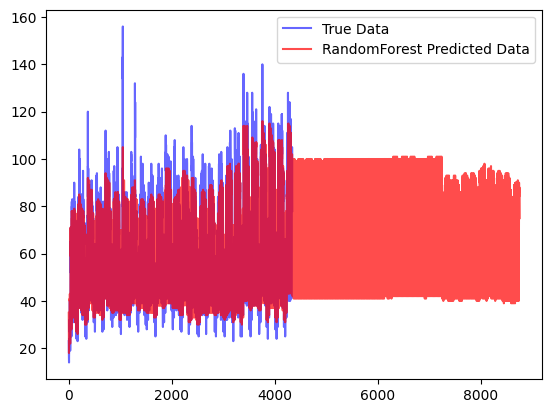

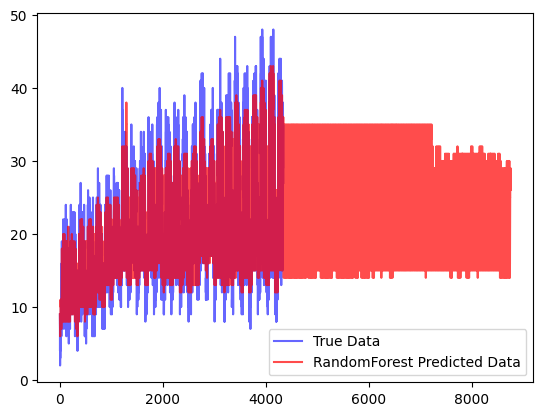

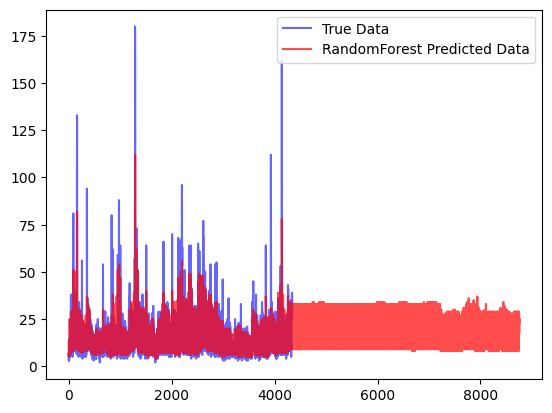

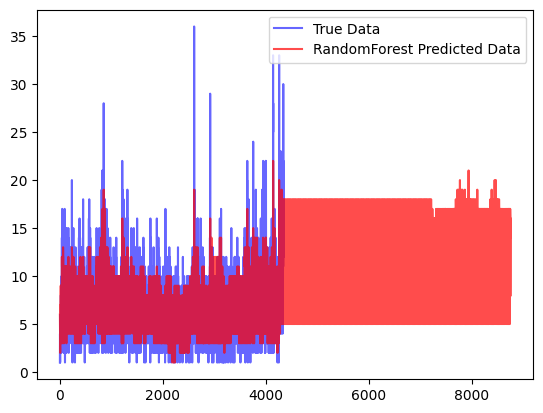

In [12]:
import matplotlib.pyplot as plt
def showPlot(predicted,true,name):
    plt.plot(true, alpha=0.6, color="blue", label="True Data")
    plt.plot(
        predicted,
        alpha=0.7,
        color="red",
        label=f"{name} Predicted Data",
    )

    # x=24*365=8760
    # plt.title(f"Generated vs Actual {n} Exponential Random Variables")
    plt.legend()
    plt.show()


showPlot(svrp1, ans1,'SVR')
showPlot(svrp2, ans2,'SVR')
showPlot(svrp3, ans3,'SVR')
showPlot(svrp4, ans4,'SVR')
showPlot(rfp1, ans1,'RandomForest')
showPlot(rfp2, ans2,'RandomForest')
showPlot(rfp3, ans3,'RandomForest')
showPlot(rfp4, ans4,'RandomForest')

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from scipy.special import huber
import tensorflow as tf
print("MAE:",mean_absolute_error( ans1,svrp1))
print("MSE:",mean_squared_error( ans1,svrp1))
print("RMSE:",mean_squared_error( ans1,svrp1,squared=False))
print("MAPE:",mean_absolute_percentage_error( ans1,svrp1))
huberLoss = tf.keras.losses.Huber()
print("HuberLoss:",huberLoss(ans1, svrp1).numpy())
print("MAE:",mean_absolute_error( ans1,rfp1))
print("MSE:",mean_squared_error( ans1,rfp1))
print("RMSE:",mean_squared_error( ans1,rfp1,squared=False))
print("MAPE:",mean_absolute_percentage_error( ans1,rfp1))
huberLoss = tf.keras.losses.Huber()
print("HuberLoss:",huberLoss(ans1, rfp1).numpy())

2023-01-25 17:19:33.564643: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 17:19:33.727078: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-25 17:19:33.727109: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-25 17:19:36.319532: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

ValueError: Found input variables with inconsistent numbers of samples: [4343, 8760]